In [5]:
#Import neccessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [27]:
# Load the Netflix dataset
Netflix= pd.read_csv('C:/Users/user/Desktop/data science/netflix dataset/netflix.csv')
Netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
# Display dataset information
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
# Drop irrelevant columns
Netflix = Netflix.drop(['director','cast','country','date_added','description'], axis= 1)
Netflix.head(5)

,show_id,type,title,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [9]:
# Describe the dataset
Netflix.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [22]:
recently_released = Netflix.query('release_year>90', inplace = False).sort_values('release_year', ascending = False)
recently_released[:10]

,show_id,type,title,release_year,rating,duration
693,s694,Movie,Ali & Ratu Ratu Queens,2021,TV-14,101 min
781,s782,Movie,Black Holes | The Edge of All We Know,2021,TV-14,99 min
762,s763,Movie,Sweet & Sour,2021,TV-14,103 min
763,s764,TV Show,Sweet Tooth,2021,TV-14,1 Season
764,s765,Movie,Trippin' with the Kandasamys,2021,TV-14,94 min
765,s766,Movie,Xtreme,2021,TV-MA,112 min
766,s767,Movie,Alan Saldaña: Locked Up,2021,TV-MA,49 min
767,s768,TV Show,Creator's File: GOLD,2021,TV-14,1 Season
768,s769,Movie,Dancing Queens,2021,TV-MA,111 min
770,s771,Movie,Myriam Fares: The Journey,2021,TV-14,72 min


In [10]:
# Filter and sort recently released movies
recently_released = Netflix.query('release_year > 1990').sort_values('release_year', ascending=False)
print("\nRecently released movies/shows:")
print(recently_released.head())


Recently released movies/shows:
    show_id     type                              title  release_year rating  \
715    s716  TV Show  Elite Short Stories: Nadia Guzmán          2021  TV-MA   
772    s773  TV Show                         Summertime          2021  TV-MA   
761    s762  TV Show            Human: The World Within          2021  TV-PG   
762    s763    Movie                       Sweet & Sour          2021  TV-14   
763    s764  TV Show                        Sweet Tooth          2021  TV-14   

      duration  
715   1 Season  
772  2 Seasons  
761   1 Season  
762    103 min  
763   1 Season  


In [11]:
# Extract release year into a series
Release_year = Netflix['release_year']
print("\nRelease year series:")
print(Release_year.head())


Release year series:
0    2020
1    2021
2    2021
3    2021
4    2021
Name: release_year, dtype: int64


In [13]:
# Additional analysis: Count of movies/shows by release year
release_year_counts = Netflix['release_year'].value_counts().sort_index()

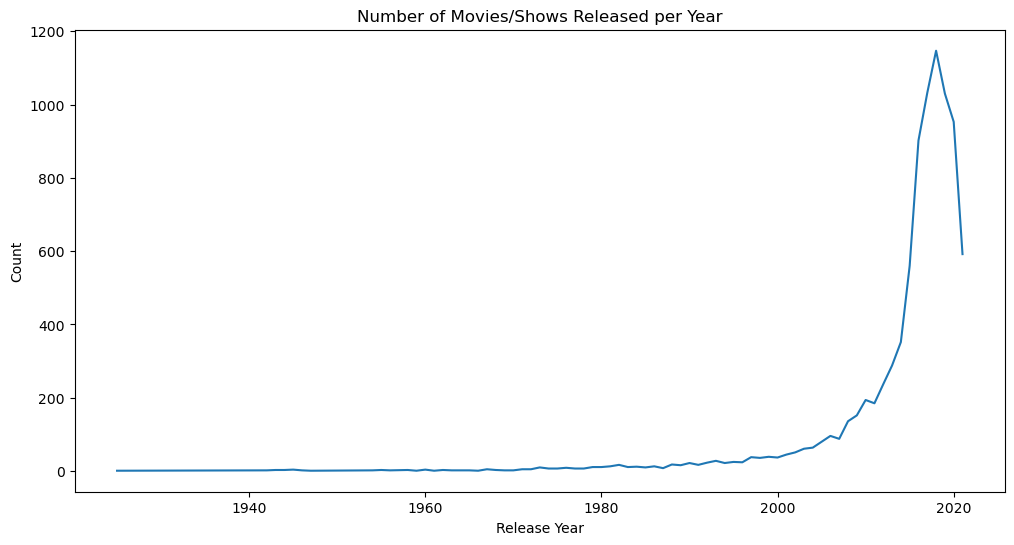

In [14]:
# Plotting the distribution of release years
plt.figure(figsize=(12, 6))
sns.lineplot(data=release_year_counts)
plt.title('Number of Movies/Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [30]:
# Additional analysis: Genre distribution
if 'listed_in' in Netflix.columns:
    genres = Netflix['listed_in'].str.split(', ').explode()
    genre_counts = genres.value_counts()

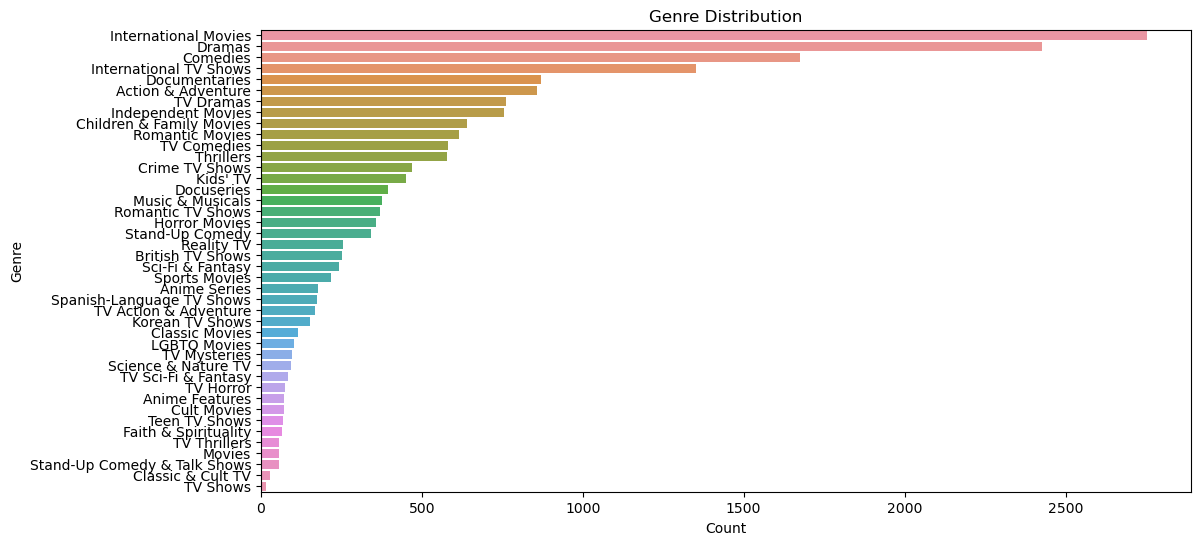

In [31]:
# Plotting the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()